# Titanic - Machine Learning from Disaster
**Description**: The goal of this project is to predict if a passenger will survive on the titanic. This work also represents as a guide on how to use different machine learning classification algorithms.


1. [Import data and python packages](#t1.)
2. [Assess Data Quality & Missing Values](#t2.)
    * 2.1. [Age - Missing Values](#t2.1.)
    * 2.2. [Cabin - Missing Values](#t2.2.)
    * 2.3. [Embarked - Missing Values](#t2.3.)
    * 2.4. [Final Adjustments to Data](#t2.4.)
        * 2.4.1 [Additional Variables](#t2.4.1.)
3. [Exploratory Data Analysis](#t3.)
4. [Building Machine Learning Models and Results](#t4.)


You can find the the repository at https://github.com/marbatlle/Titanic_Project

<a id="t1."></a>
# 1. Import Data & Python Packages

In [1]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')
sns.set_palette("Set2")

print("Setup Complete")

Setup Complete


The datasets used in this competition consists on two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled *train.csv* and the other is titled *test.csv*.

Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

The *test.csv* dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

Using the patterns you find in the train.csv data, predict whether the other 418 passengers on board (found in test.csv) survived. 


The columns consist on:

* **Survival:** 0 = No, 1 = Yes

* **pclass (Ticket class):** 1 = 1st, 2 = 2nd, 3 = 3rd

* **sex:** Sex

* **Age:** Age in years

* **sibsp:** number of siblings/spouses aboard the Titanic

* **parch:** number of parents/children aboard the Titanic

* **ticket:** Ticket number

* **fare:** Passenger fare

* **cabin:** Cabin number

* **embarked:** Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

In [2]:
# Import train and test data
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
gender_submission = pd.read_csv('data/gender_submission.csv') # example of what a submission should look like

# Print the first rows of the training data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print('The number of samples into the train data is {}.'.format(train.shape[0]))

The number of samples into the train data is 891.


In [4]:
# View snipped of the training data
test.head() # We can see it contains the same columns as the test df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print('The number of samples into the test data is {}.'.format(test.shape[0]))

The number of samples into the test data is 418.


We can see that there is no target variable in the test data, since as we said earlier, the goal is to predict this target using different machine learning algorithms.

<a id="t2."></a>
# 2. Data Quality & Missing Value Assessment

We need to figure out where we are missing data to account it once we are doing a prediction.

In [6]:
# We need to see the amount of missing values present in each column.
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

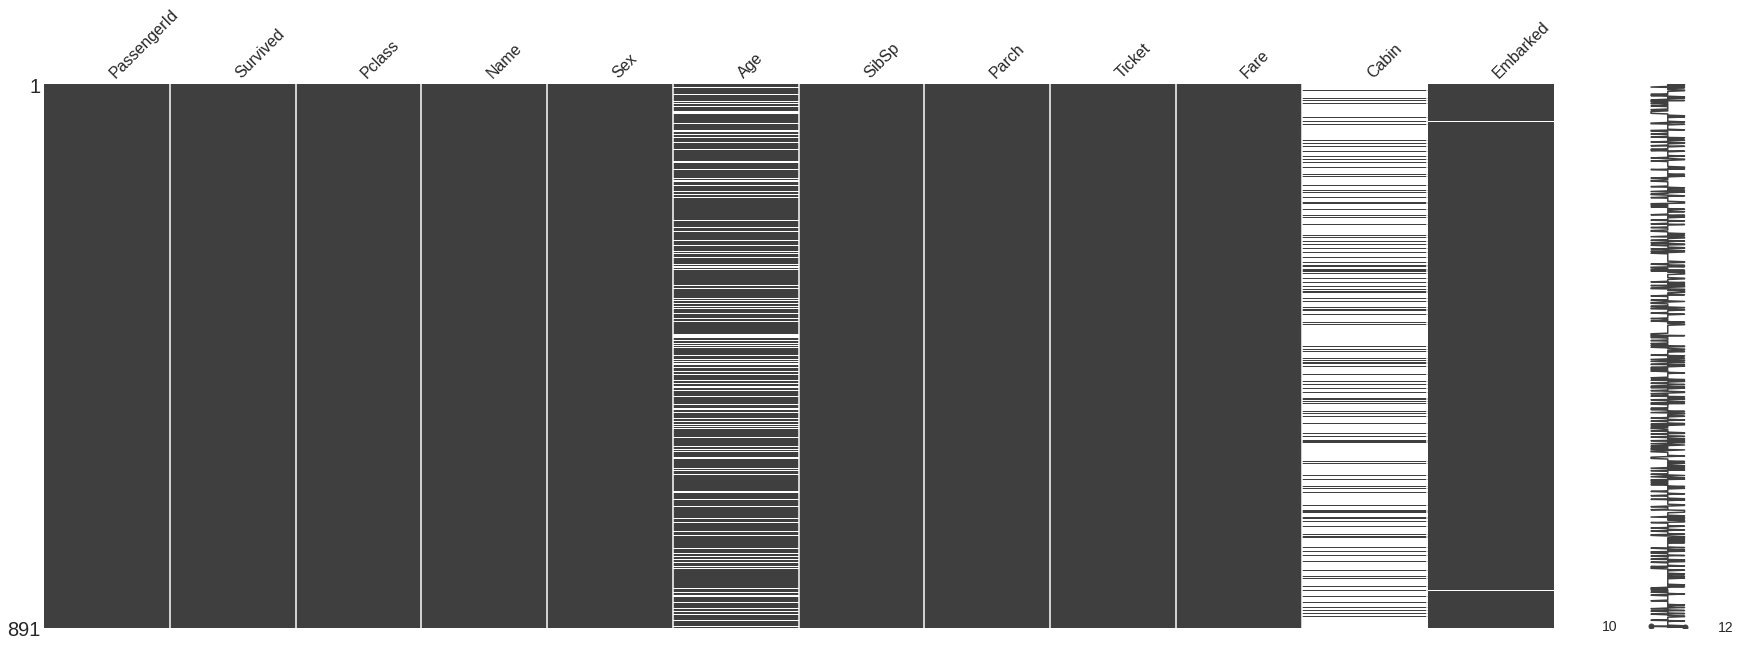

In [7]:
# Plot graphic of missing values
missingno.matrix(train, figsize = (30,10))

Checking which columns contain empty values, looks like columns Age, Cabin and embarked are the only columns missing some values. 

### Data Types
We can see our dataset consist on different types of data. However, as we continue to analyze it, we might find features which are numerical and should actually be categorial.

In [191]:
# Different data types in the dataset
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<a id="t2.1."></a>
## 2.1.    Age - Missing Values

In [192]:
# percent of missing "Age" 
print('Percent of missing "Age" records is %.2f%%' %((train['Age'].isnull().sum()/train.shape[0])*100))

Percent of missing "Age" records is 19.87%


~20% of entries for passenger age are missing. Let's see what the 'Age' variable looks like in general.

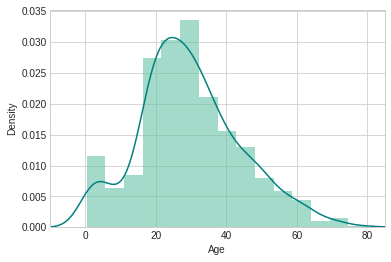

In [193]:
ax = train["Age"].hist(bins=15, density=True, stacked=True, alpha=0.6)
train["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

Since "Age" is (right) skewed, using the mean might give us biased results by filling in ages that are older than desired. To deal with this, we'll use the median to impute the missing values. 

In [194]:
# mean age
print('The mean of "Age" is %.2f' %(train["Age"].mean(skipna=True)))
# median age
print('The median of "Age" is %.2f' %(train["Age"].median(skipna=True)))

The mean of "Age" is 29.70
The median of "Age" is 28.00


<a id="t2.2."></a>
## 2.2. Cabin - Missing Values

In [195]:
# percent of missing "Cabin" 
print('Percent of missing "Cabin" records is %.2f%%' %((train['Cabin'].isnull().sum()/train.shape[0])*100))

Percent of missing "Cabin" records is 77.10%


77% of records are missing, which means that imputing information and using this variable for prediction is probably not wise.  We'll ignore this variable in our model.

<a id="t2.3."></a>
## 2.3. Embarked - Missing Values

In [196]:
# percent of missing "Embarked" 
print('Percent of missing "Embarked" records is %.2f%%' %((train['Embarked'].isnull().sum()/train.shape[0])*100))

Percent of missing "Embarked" records is 0.22%


There are only 2 (0.22%) missing values for "Embarked", so we can just impute with the port where most people boarded.

Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
S    644
C    168
Q     77
Name: Embarked, dtype: int64


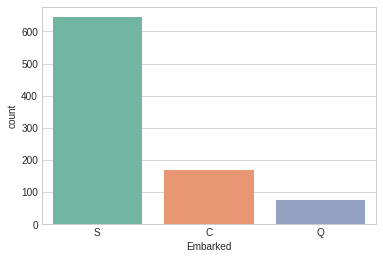

In [197]:
print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(train['Embarked'].value_counts())
sns.countplot(x='Embarked', data=train)
plt.show()

By far the most passengers boarded in Southhampton, so we'll impute those 2 NaN's w/ "S".

<a id="t2.4."></a>
## 2.4. Final Adjustments to Data (Train & Test)

Based on my assessment of the missing values in the dataset, I'll make the following changes to the data:
* If "Age" is missing for a given row, I'll impute with 28 (median age).
* If "Embarked" is missing for a riven row, I'll impute with "S" (the most common boarding port).
* I'll ignore "Cabin" as a variable. There are too many missing values for imputation. 

In [198]:
train_data = train.copy()
train_data["Age"].fillna(train["Age"].median(skipna=True), inplace=True)
train_data["Embarked"].fillna(train['Embarked'].value_counts().idxmax(), inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)

In [199]:
# check missing values in adjusted train data
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [200]:
# preview adjusted train data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


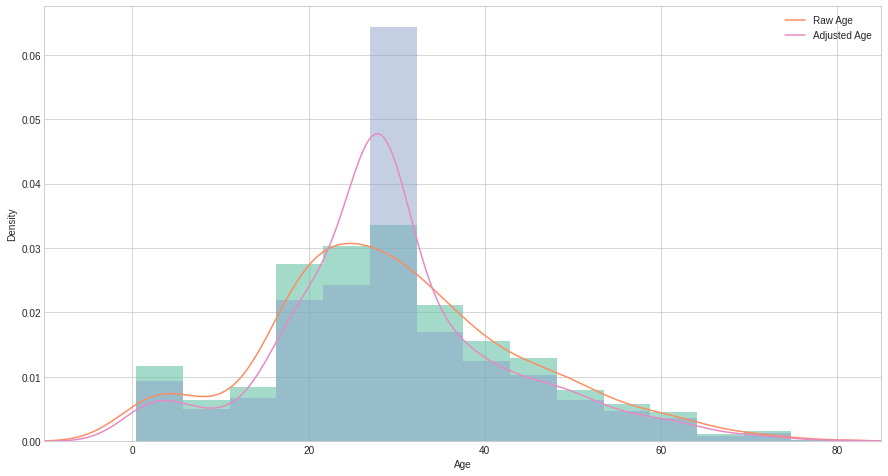

In [201]:
plt.figure(figsize=(15,8))
ax = train["Age"].hist(bins=15, density=True, stacked=True, alpha=0.6)
train["Age"].plot(kind='density')
ax = train_data["Age"].hist(bins=15, density=True, stacked=True, alpha=0.5)
train_data["Age"].plot(kind='density')
ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

<a id="t2.4.1."></a>
## 2.4.1. Additional Variables

According to the Kaggle data dictionary, both SibSp and Parch relate to traveling with family. For simplicity's sake (and to account for possible multicollinearity), I'll combine the effect of these variables into one categorical predictor: whether or not that individual was traveling alone.

In [202]:
## Create categorical variable for traveling alone
train_data['TravelAlone']=np.where((train_data["SibSp"]+train_data["Parch"])>0, 0, 1)
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)

I'll also create categorical variables for Passenger Class ("Pclass"), Gender ("Sex"), and Port Embarked ("Embarked"). 

In [203]:
#create categorical variables and drop some variables
training=pd.get_dummies(train_data, columns=["Pclass","Embarked","Sex"])
training.drop('Sex_female', axis=1, inplace=True)
training.drop('PassengerId', axis=1, inplace=True)
training.drop('Name', axis=1, inplace=True)
training.drop('Ticket', axis=1, inplace=True)

final_train = training
final_train.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


### Now, apply the same changes to the test data. <br>
I will apply to same imputation for "Age" in the Test data as I did for my Training data (if missing, Age = 28).  <br> I'll also remove the "Cabin" variable from the test data, as I've decided not to include it in my analysis. <br> There were no missing values in the "Embarked" port variable. <br> I'll add the dummy variables to finalize the test set.  <br> Finally, I'll impute the 1 missing value for "Fare" with the median, 14.45.

In [204]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [205]:
test_data = test.copy()
test_data["Age"].fillna(train["Age"].median(skipna=True), inplace=True)
test_data["Fare"].fillna(train["Fare"].median(skipna=True), inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

test_data['TravelAlone']=np.where((test_data["SibSp"]+test_data["Parch"])>0, 0, 1)

test_data.drop('SibSp', axis=1, inplace=True)
test_data.drop('Parch', axis=1, inplace=True)

testing = pd.get_dummies(test_data, columns=["Pclass","Embarked","Sex"])
testing.drop('Sex_female', axis=1, inplace=True)
testing.drop('PassengerId', axis=1, inplace=True)
testing.drop('Name', axis=1, inplace=True)
testing.drop('Ticket', axis=1, inplace=True)

final_test = testing
final_test.head()

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,0,0,1,0,1,0,1
1,47.0,7.0000,0,0,0,1,0,0,1,0
2,62.0,9.6875,1,0,1,0,0,1,0,1
3,27.0,8.6625,1,0,0,1,0,0,1,1
4,22.0,12.2875,0,0,0,1,0,0,1,0


<a id="t3."></a>
# 3. Exploratory Data Analysis

## 3.1. Exploration of our Target Feature: Survived
Description: Whether the passenger survived or not.
    
Key: 0 = did not survive, 1 = survived
    
This is the variable we want our machine learning model to predict based off all the others.

<AxesSubplot:xlabel='Survived', ylabel='count'>

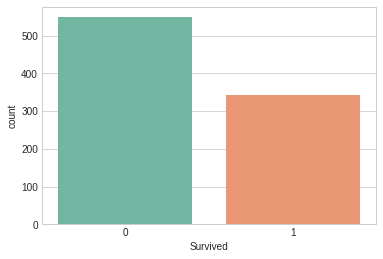

In [206]:
# Visualize the count of survivors
sns.countplot('Survived', data=train)

## 3.2. Exploration of Passenger Class

Description: The ticket class of the passenger.

Key: 1 = 1st, 2 = 2nd, 3 = 3rd

We will look at the distribution for each feature to determine if there are values which are completely outside of distribution, we may not want to include them in our model

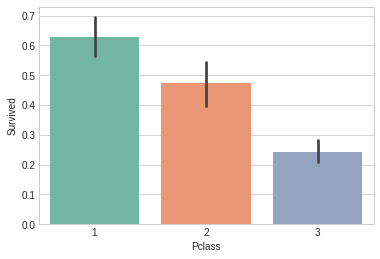

In [207]:
sns.barplot('Pclass', 'Survived', data=train)
plt.show()

## 3.3. Exploration of Gender Variable
Description: The sex of the passenger (male or female).

0 = male
1 = female

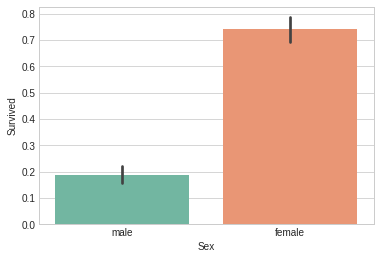

In [208]:
sns.barplot('Sex', 'Survived', data=train)
plt.show()

This is a very obvious difference.  Clearly being female greatly increased your chances of survival.

## 3.4. Exploration of Age
Description: The age of the passenger.

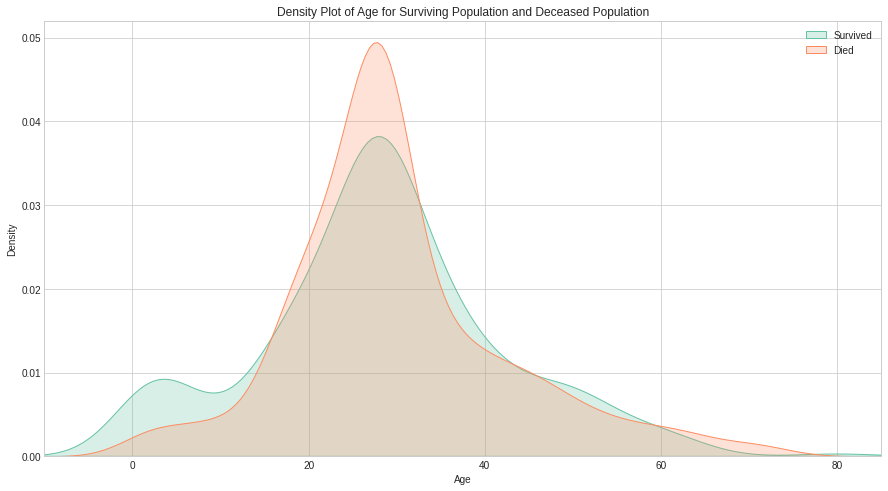

In [209]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Age"][final_train.Survived == 1], shade=True)
sns.kdeplot(final_train["Age"][final_train.Survived == 0], shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

The age distribution for survivors and deceased is actually very similar.  One notable difference is that, of the survivors, a larger proportion were children.  The passengers evidently made an attempt to save children by giving them a place on the life rafts. 


1. [Import data and python packages](#t1.)
2. [Assess Data Quality & Missing Values](#t2.)
3. [Exploratory Data Analysis](#t3.)
4. [Logistic Regression and Results](#t4.)

## 3.5. Exploration of Traveling Alone vs. With Family

Description: This feature describes if the passenger had any siblings, spouses, children or parents aboard the Titanic.

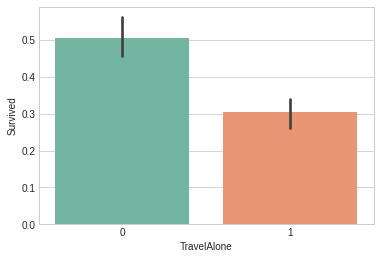

In [210]:
sns.barplot('TravelAlone', 'Survived', data=final_train)
plt.show()

Individuals traveling without family were more likely to die in the disaster than those with family aboard. Given the era, it's likely that individuals traveling alone were likely male.

## 3.6. Exploration of Fare

Description: How much the ticket cost.

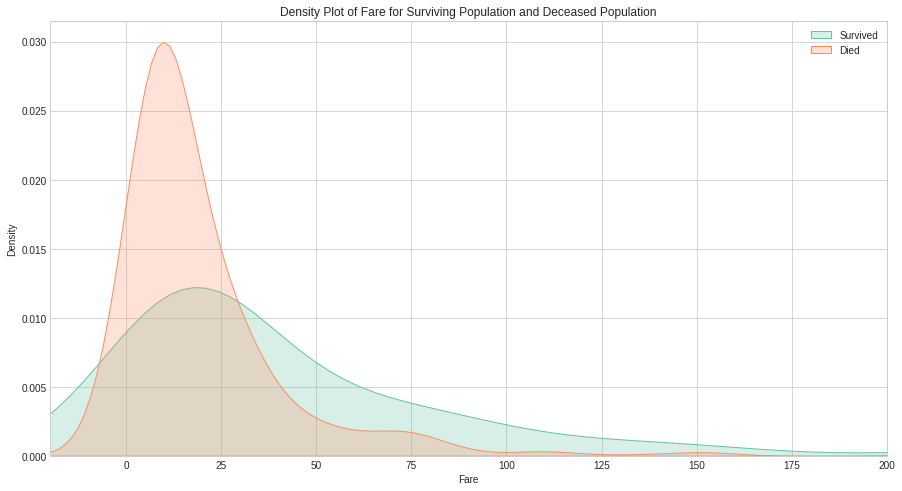

In [211]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_train["Fare"][final_train.Survived == 1], shade=True)
sns.kdeplot(final_train["Fare"][final_train.Survived == 0], shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

As the distributions are clearly different for the fares of survivors vs. deceased, it's likely that this would be a significant predictor in our final model.  Passengers who paid lower fare appear to have been less likely to survive.  This is probably strongly correlated with Passenger Class.

## 3.7. Exploration of Embarked

Description: The port where the passenger boarded the Titanic.

Key: C = Cherbourg, Q = Queenstown, S = Southampton

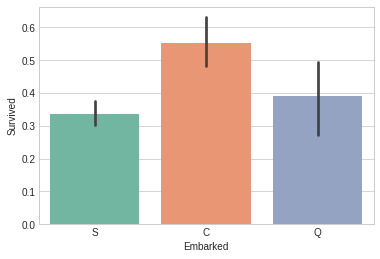

In [212]:
sns.barplot('Embarked', 'Survived', data=train)
plt.show()

Passengers who boarded in Cherbourg, France, appear to have the highest survival rate.  Passengers who boarded in Southhampton were marginally less likely to survive than those who boarded in Queenstown.  This is probably related to passenger class, or maybe even the order of room assignments.

<a id="t4."></a>
# 4. Building Machine Learning Models and Results

### Step 1. Load the libraries

In [213]:
# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

print("Setup Complete")

Setup Complete


### Step 2. Separate the data

In [214]:
# Let's look at our data
final_train.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


In [215]:
# Split the dataframe into data and labels
X = final_train.drop('Survived', axis=1) # data
y = final_train.Survived # labels

In [216]:
# Shape of the data (without labels)
X.shape

(891, 10)

Given that we want to evaluate every model that we use, for this example, we will use a metric called **Mean Absoulute Error (MAE)**. With this goal, we will measure the performance of the model on data that was not used to build the model (validation data). The scikit-learn library has a function train_test_split to break up the data in two pieces. We'' use some of the data as a training data to fit the model, and we'll use the other data as validation data to calculate mean_absolute error.

In [217]:
# split the data intro training and validation data, split based on a random number generator.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

### Step 3. Define and Validate the model
#### Decision Tree Classifier

In [218]:
# Define model
tree_model = DecisionTreeClassifier(random_state=1)

# Fit model
tree_model.fit(train_X, train_y);

# Get MAE on Model
val_tree_predictions = tree_model.predict(val_X)
print(mean_absolute_error(val_y,val_tree_predictions))

0.2062780269058296


Our mean absolute error for the out-of-sample data when using the Decision Tree Classifier Model is 0.2063.

#### Random Forests
Decision trees leave you with a difficult decision. A deep tree with lots of leaves will overfit because each prediction is coming from historical data from only the few houses at its leaf. But a shallow tree with few leaves will perform poorly because it fails to capture as many distinctions in the raw data.

Even today's most sophisticated modeling techniques face this tension between underfitting and overfitting. But, many models have clever ideas that can lead to better performance. We'll look at the random forest as an example.

The random forest uses many trees, and it makes a prediction by averaging the predictions of each component tree. It generally has much better predictive accuracy than a single decision tree and it works well with default parameters. If you keep modeling, you can learn more models with even better performance, but many of those are sensitive to getting the right parameters.

In [219]:
# Define model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=1)

# Fit Model
rf_model.fit(train_X, train_y);

# Get MAE on model
rf_preds = rf_model.predict(val_X)
print(mean_absolute_error(val_y, rf_preds))


0.25053859645628085


In this case, we can see that the MAE is slightly larger than when using the Decision Tree Classifier Model. For this reason, we will use the earlier model to predict the outcome.

### Step 4. Predict


In [220]:
# Create a list of columns to be used for the predictions
wanted_test_columns = X.columns
wanted_test_columns

Index(['Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_male'],
      dtype='object')

In [221]:
# Make Predictions
predictions = tree_model.predict(final_test[wanted_test_columns])

In [222]:
# Our predictions array is comprised of 0's and 1's (Survived or Did Not Survive)
predictions[:20]

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0])

### Step 5. Submission

In [223]:
# Create a submisison dataframe and append the relevant columns
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = predictions # our model predictions on the test dataset
submission.head()


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


We need our submission dataframe to look like the gender_submisison dataframe, so we'll turn the Survived column into integers.

In [224]:
# Let's convert our submission dataframe 'Survived' column to ints
submission['Survived'] = submission['Survived'].astype(int)
print('Converted Survived column to integers.')

Converted Survived column to integers.


In [225]:
# How does our submission dataframe look?
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


In [226]:
# Are our test and submission dataframes the same length?
if len(submission) == len(test):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

Submission dataframe is the same length as test (418 rows).


In [227]:
# Convert submisison dataframe to csv for submission to csv 
# for Kaggle submisison
submission.to_csv('../decisiontreeclassifier_submission.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!


In [228]:
# Check the submission csv to make sure it's in the right format
submissions_check = pd.read_csv("../decisiontreeclassifier_submission.csv")
submissions_check.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
